<a href="https://colab.research.google.com/github/Ngamimuli/learning-DVF-PT/blob/main/Gloria_Muli_phase1project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this session i will be analysing data and comparing these variables: name of movie, original language, popularity, vote_count, release date, product budget, world wide gross, genre, release month, and ROI to help predict and make decisinon what type of films Microsoft should create. i should also be able to not only do the analysis but also visualise the data in appropriate plots.
i think it will also be important to familiarise myself with the some terms so as to fully understand and interprete the data effectively:
*variables*

1.   Worldwide gross refers to the total box office revenue that a film generates from its theatrical release across all countries around the globe. It includes all the ticket sales from every market in which the film is released, making it a crucial metric for assessing a film's financial success and profitability on a global scale.
2. vote count refers to the total number of ratings or votes a movie receives from viewers, typically on online platforms or databases. It is a critical metric used to gauge the film's popularity, audience engagement, and overall reception. The vote count is often displayed alongside the film's average rating or score, providing additional context about how widely and actively a movie has been viewed and rated by audiences.
3.ROI (Return on Investment) is a financial metric used to evaluate the profitability of an investment, such as a movie production. It measures the efficiency of an investment or compares the profitability of several investments. ROI is expressed as a percentage, indicating how much profit or loss an investment has generated relative to its cost.




In [1]:
# code below is for importing necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# For handling date and time sice we are have release dates as variables
from datetime import datetime


Below i will be loading and inspecting the data set ad inspecting it so as to understand data and information given.

In [4]:
# loading the dataset
df= pd.read_csv('/content/df_final_alex_vj.csv')


In [5]:
# inspecting the set of data by looking into the first few rows to see shape
print(df.head())

                   movie original_language  popularity  vote_average  \
0                #horror                de       6.099           3.3   
1    10 cloverfield lane                en      17.892           6.9   
2  10 days in a madhouse                en       0.955           5.4   
3              12 strong                en      13.183           5.6   
4       12 years a slave                en      16.493           7.9   

   vote_count release_date  production_budget  worldwide_gross  \
0         102   2015-11-20            1500000                0   
1        4629   2016-03-11            5000000        108286422   
2           7   2015-11-11           12000000            14616   
3        1312   2018-01-19           35000000         71118378   
4        6631   2013-10-18           20000000        181025343   

            genres  release_month        ROI  
0  multiple_genres             11   -1500000  
1  multiple_genres              3  103286422  
2            drama           

In [6]:
#printig basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie              1834 non-null   object 
 1   original_language  1834 non-null   object 
 2   popularity         1834 non-null   float64
 3   vote_average       1834 non-null   float64
 4   vote_count         1834 non-null   int64  
 5   release_date       1834 non-null   object 
 6   production_budget  1834 non-null   int64  
 7   worldwide_gross    1834 non-null   int64  
 8   genres             1834 non-null   object 
 9   release_month      1834 non-null   int64  
 10  ROI                1834 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 157.7+ KB
None


In [8]:
#this is part of inspectig where we iitent on seeing the column summary contents of the data set
# getting mean, standard deviation and the minimum and maximum values
print(df.describe())


        popularity  vote_average    vote_count  production_budget  \
count  1834.000000   1834.000000   1834.000000       1.834000e+03   
mean     10.931178      6.176172   1704.708833       3.834575e+07   
std       8.180437      1.096821   2689.767236       5.200167e+07   
min       0.600000      0.000000      1.000000       9.000000e+03   
25%       6.110250      5.600000     85.250000       5.000000e+06   
50%       9.592500      6.200000    653.500000       2.000000e+07   
75%      14.449750      6.900000   2092.250000       4.600000e+07   
max      80.773000     10.000000  22186.000000       4.250000e+08   

       worldwide_gross  release_month           ROI  
count     1.834000e+03    1834.000000  1.834000e+03  
mean      1.190712e+08       6.884406  8.072547e+07  
std       2.226756e+08       3.481343  1.836923e+08  
min       0.000000e+00       1.000000 -1.104502e+08  
25%       3.287706e+06       4.000000 -1.688551e+06  
50%       3.668101e+07       7.000000  1.364081e+07  


Here, i will be cleaning the data so as to handle missing values and duplicates.

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Handling missing values  - dropping rows with missing value
df.dropna(inplace=True)

# Check for duplicates and remove them t ensure integrity of results
df.drop_duplicates(inplace=True)

# Convert 'release date' to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

# Convert 'release month' to categorical
df['release_month'] = df['release_date'].dt.month


Missing Values:
 movie                0
original_language    0
popularity           0
vote_average         0
vote_count           0
release_date         0
production_budget    0
worldwide_gross      0
genres               0
release_month        0
ROI                  0
dtype: int64


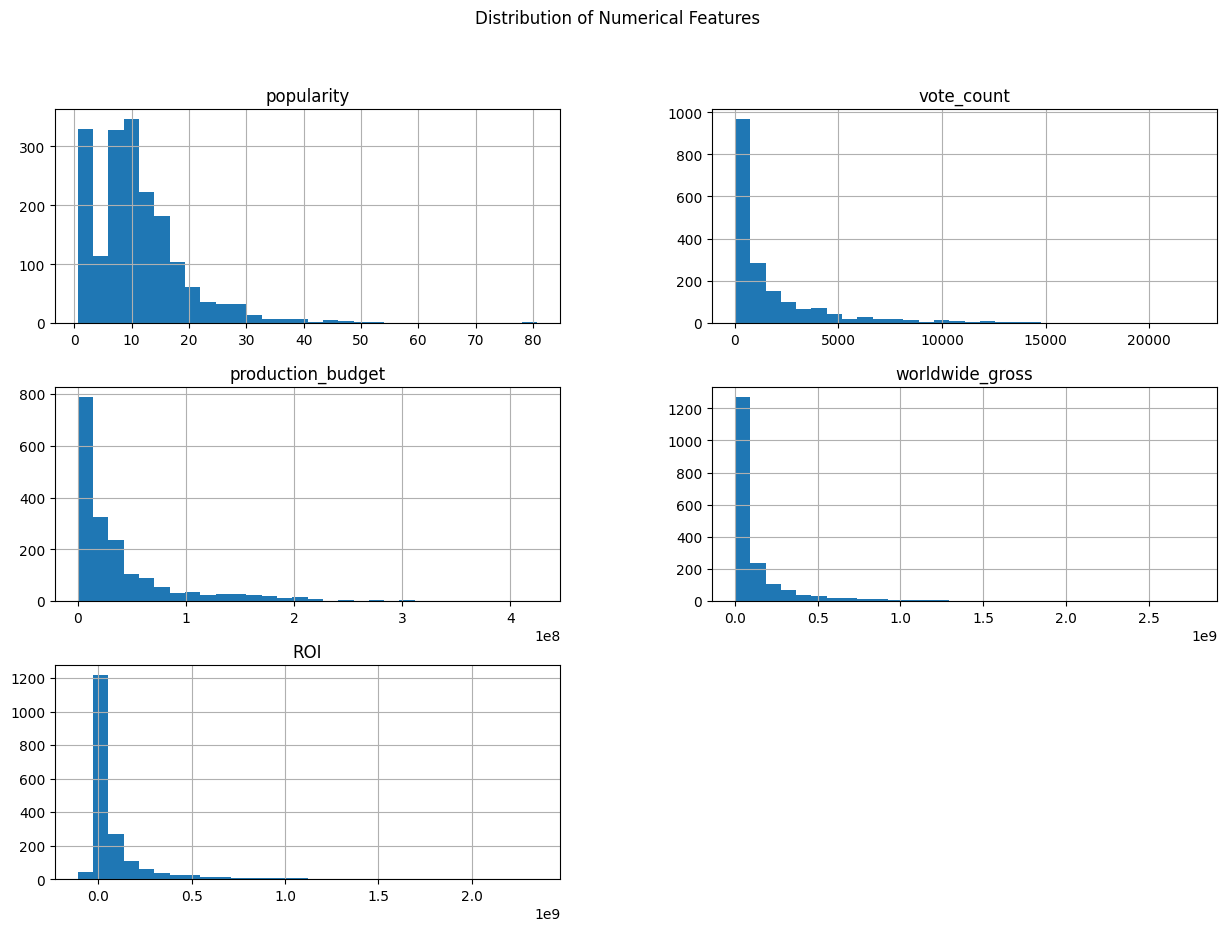

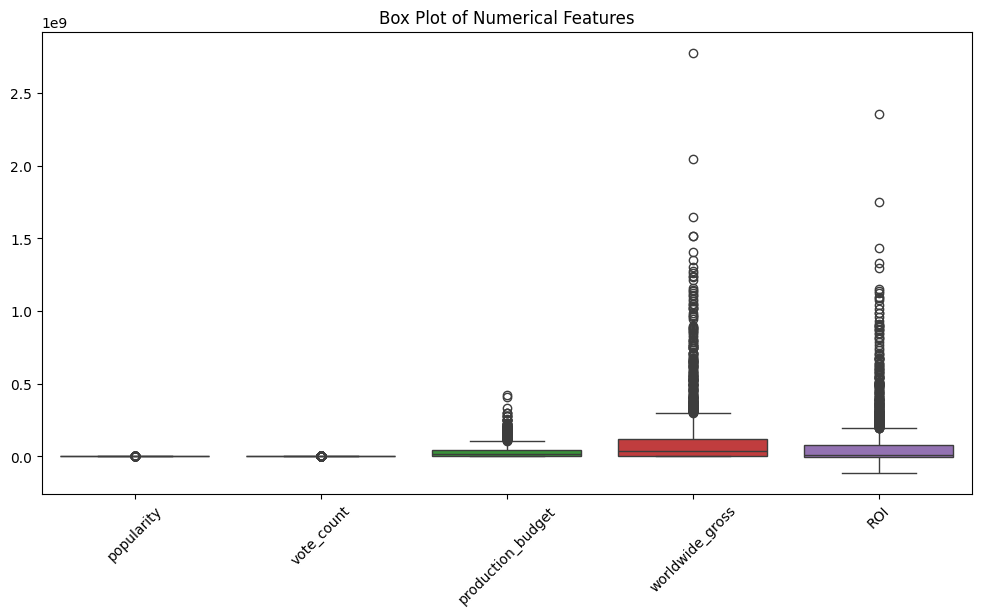

In [22]:
# this is to examine distribution of numerical features
# Histogram for numerical features
df[['popularity', 'vote_count', 'production_budget', 'worldwide_gross', 'ROI']].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Box plot for checking outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['popularity', 'vote_count', 'production_budget', 'worldwide_gross', 'ROI']])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()


carried out this step because i was getting so many errors that made me realise i had a number of names and identities wrong. it made it easier to correct errors in codes and review variable names.

In [17]:
# Print column names
print("Column Names in DataFrame:")
print(df.columns.tolist())


Column Names in DataFrame:
['movie', 'original_language', 'popularity', 'vote_average', 'vote_count', 'release_date', 'production_budget', 'worldwide_gross', 'genres', 'release_month', 'ROI']


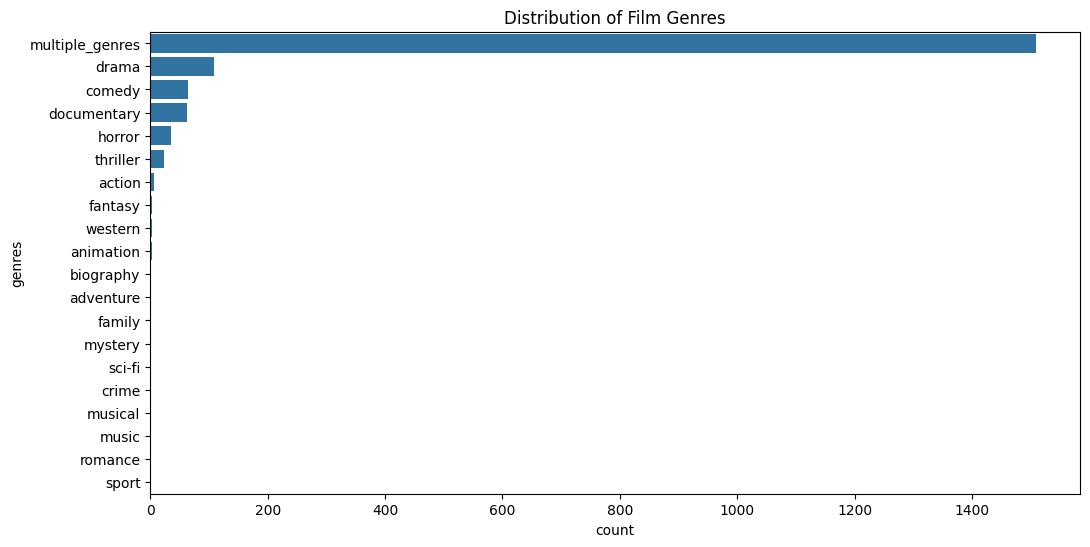

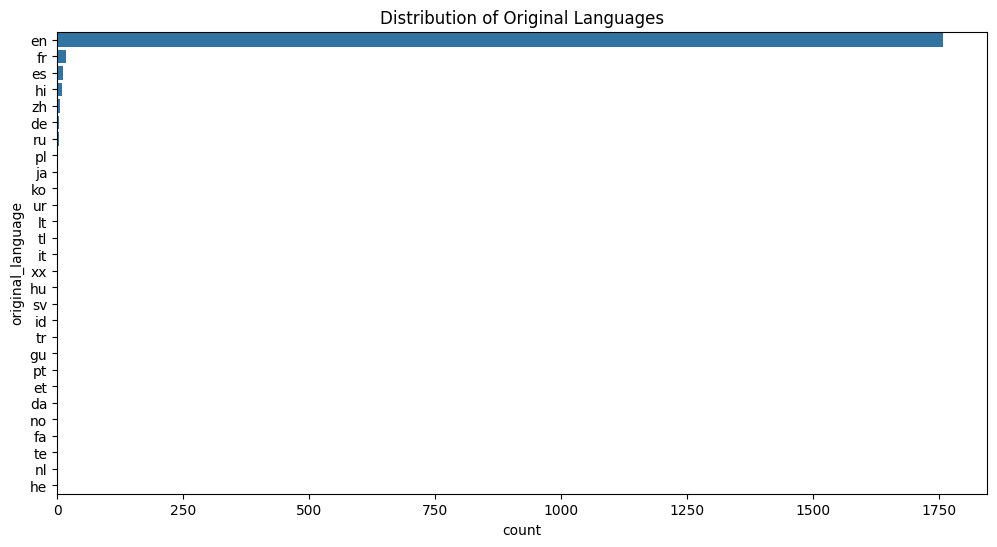

In [23]:
#the aim here is to visualize the frequency of each category to see which genres are common in the variables
# Count plot for genres
plt.figure(figsize=(12, 6))
sns.countplot(y='genres', data=df, order=df['genres'].value_counts().index)
plt.title('Distribution of Film Genres')
plt.show()

# Count plot for original language
plt.figure(figsize=(12, 6))
sns.countplot(y='original_language', data=df, order=df['original_language'].value_counts().index)
plt.title('Distribution of Original Languages')
plt.show()


Below, I am starting on the comparison of variables and variabes that will help us see the relationships between variables. the different visualizatios will aid in analysis and drawing conclusions.

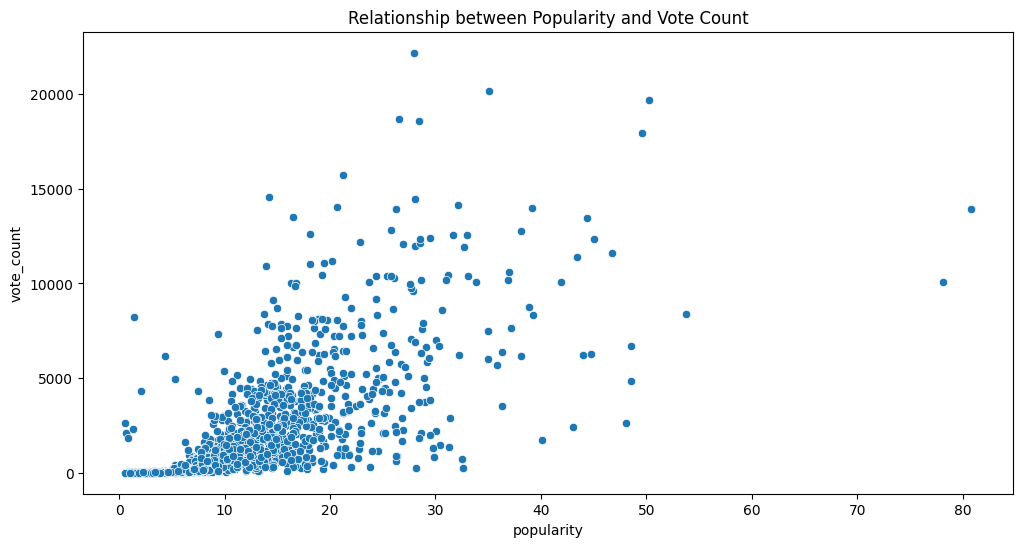

In [24]:
# looking at relationships between variables
# Scatter plot for popularity vs. vote count
plt.figure(figsize=(12, 6))
sns.scatterplot(x='popularity', y='vote_count', data=df)
plt.title('Relationship between Popularity and Vote Count')
plt.show()

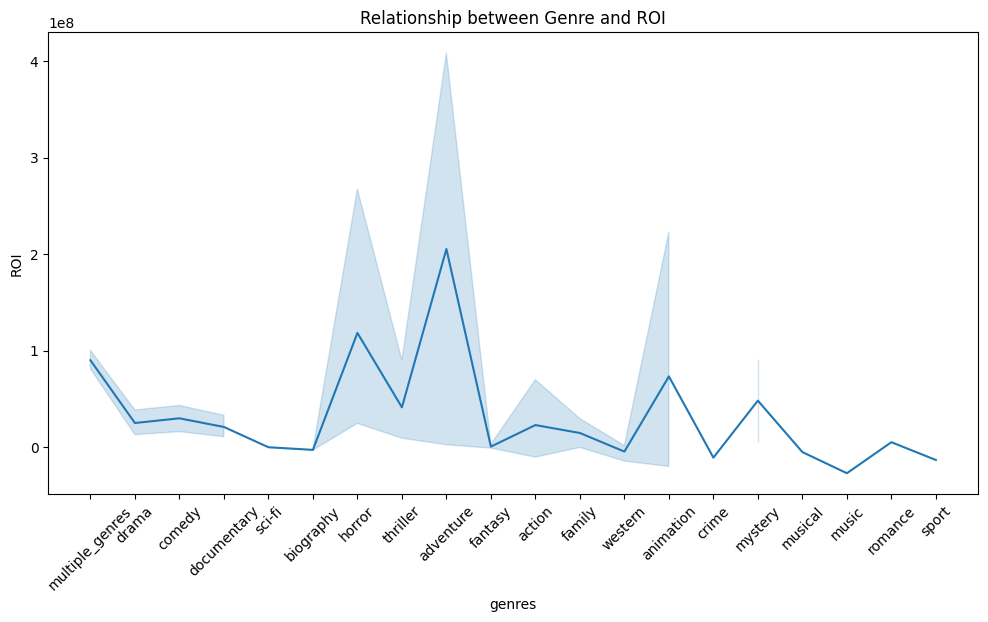

In [26]:
# lookng into relationship between genres and ROI
# line graph between genre and ROI
plt.figure(figsize=(12, 6))
sns.lineplot(x='genres', y='ROI', data=df)
plt.title('Relationship between Genre and ROI')
plt.xticks(rotation=45)
plt.show()


In [27]:
# looking into relationship of bugdets and gross
# correlation between production budgets and worldwide gross
correlation = df['production_budget'].corr(df['worldwide_gross'])
print("Correlation between Production Budget and Worldwide Gross:", correlation)

Correlation between Production Budget and Worldwide Gross: 0.8007994786766458


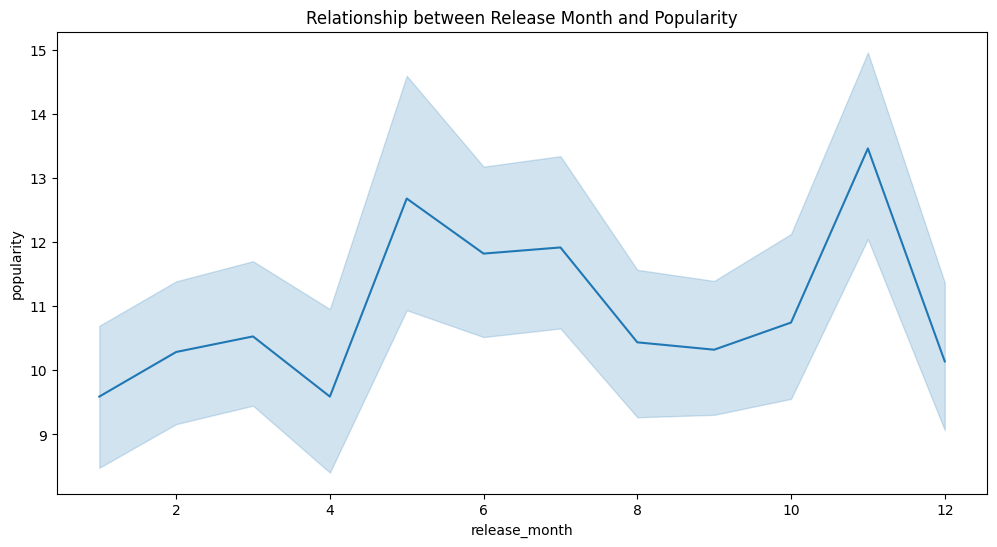

In [28]:
#looking into relationship among releae month, release date and  popularity
# line graph between release month and popularity
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_month', y='popularity', data=df)
plt.title('Relationship between Release Month and Popularity')
plt.show()

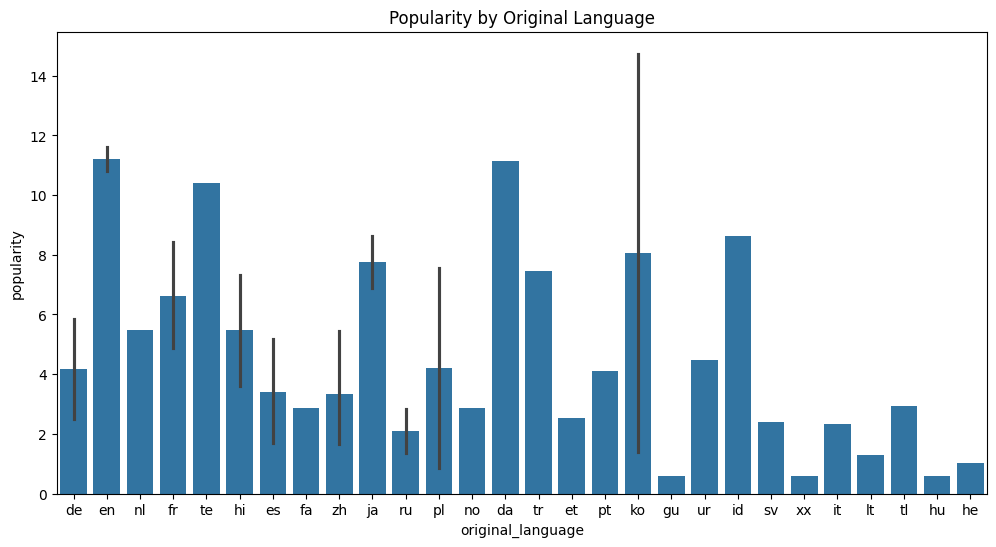

In [29]:
# looking into how popurity is related to original language
# bar graph for popularity by original language
plt.figure(figsize=(12, 6))
sns.barplot(x='original_language', y='popularity', data=df)
plt.title('Popularity by Original Language')
plt.show()


Below, i will be trying to Identify factors that contribute to the success of films, such as high revenue or critical acclaim. i will be using different visualization tools from above for comparisn reasons.

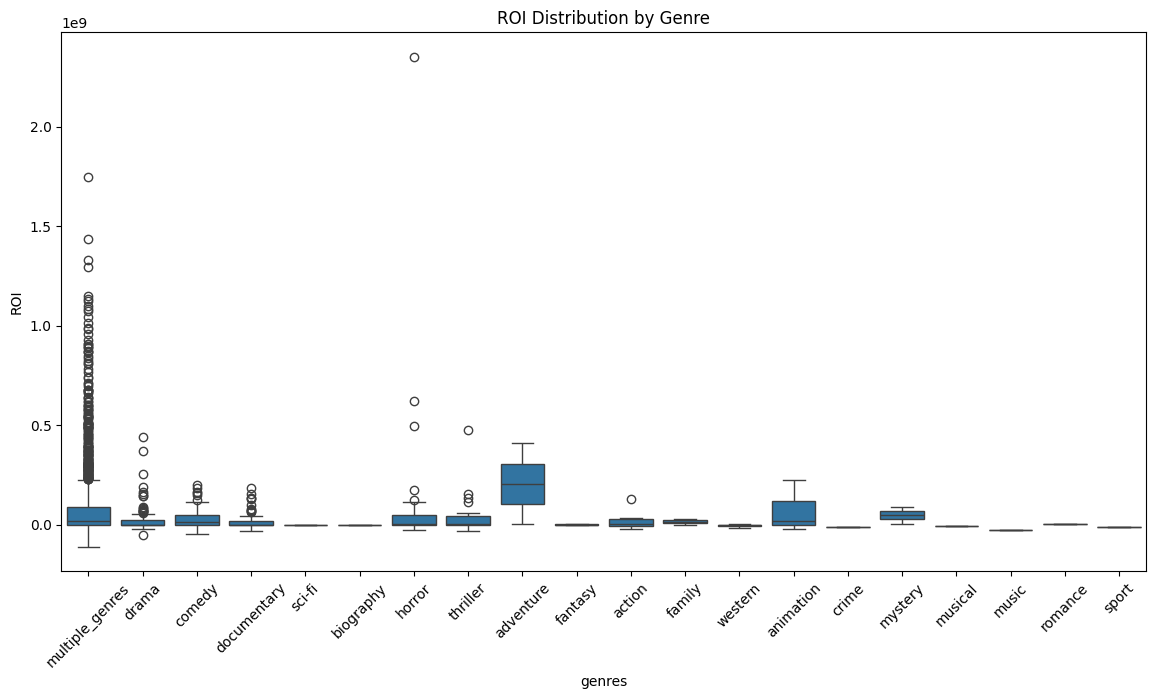

In [32]:
# ROI analysis
#Helps identify which genres are more likely to provide higher returns on investment.
# ROI distribution by genre
plt.figure(figsize=(14, 7))
sns.boxplot(x='genres', y='ROI', data=df)
plt.title('ROI Distribution by Genre')
plt.xticks(rotation=45)
plt.show()

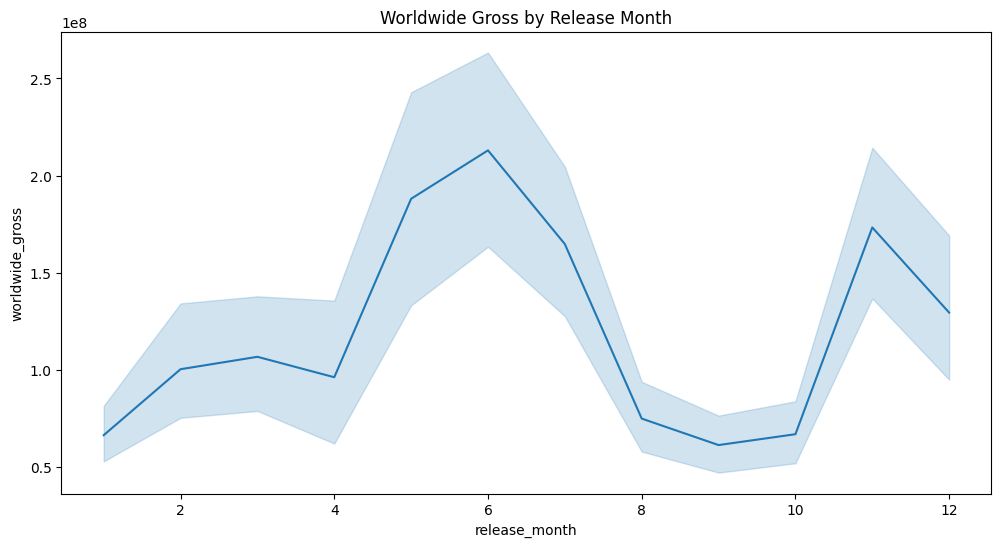

In [33]:
# Analyze worldwide gross by release month
# line graph for worldwide gross by release month
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_month', y='worldwide_gross', data=df)
plt.title('Worldwide Gross by Release Month')
plt.show()


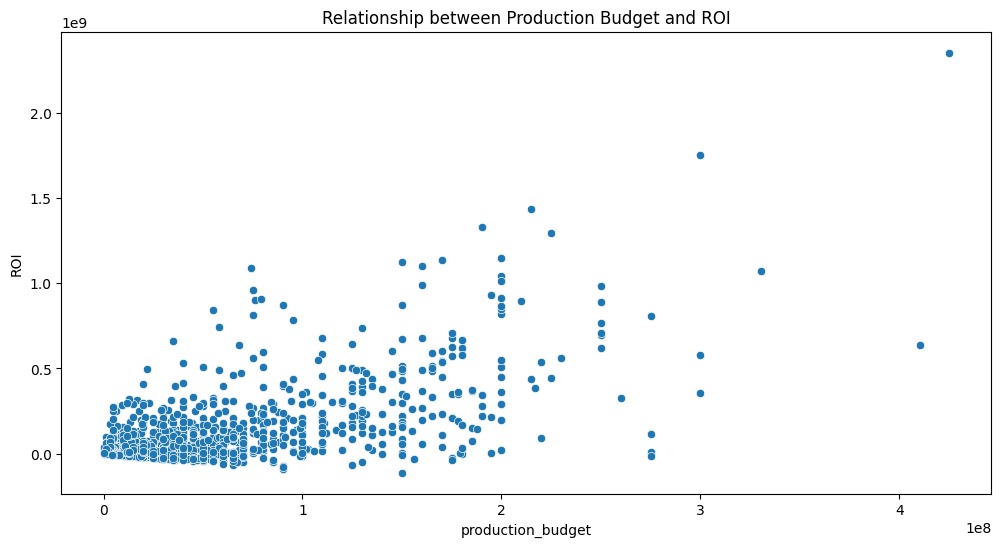

In [34]:
# Budget vs ROI
# Scatter plot for production budget vs. ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='production_budget', y='ROI', data=df)
plt.title('Relationship between Production Budget and ROI')
plt.show()



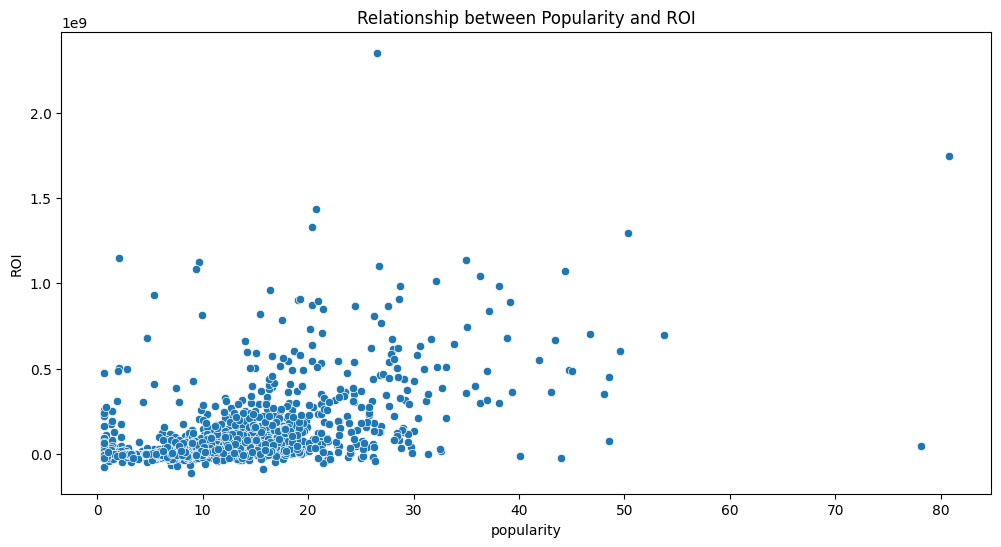

In [35]:
# Popularity vs ROI
# Scatter plot for popularity vs. ROI
plt.figure(figsize=(12, 6))
sns.scatterplot(x='popularity', y='ROI', data=df)
plt.title('Relationship between Popularity and ROI')
plt.show()

below i will be doing a time series analysis to seethe trends over time. the main focus will be on :

1.   release date and release year
2.   genres



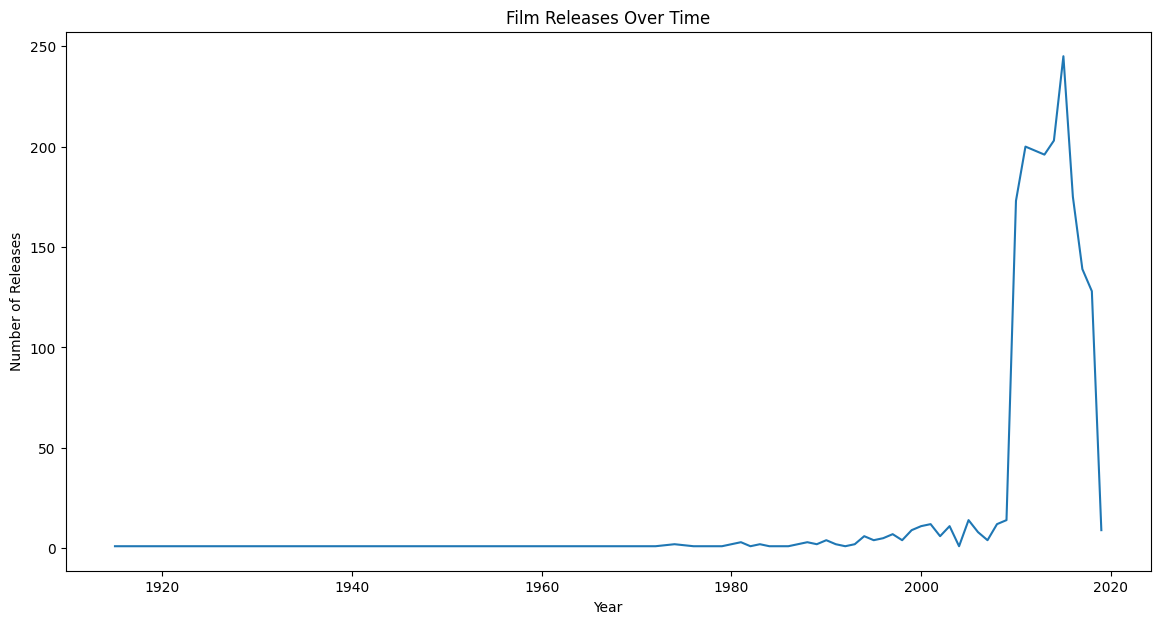

Text(0.5, 0, 'Year')

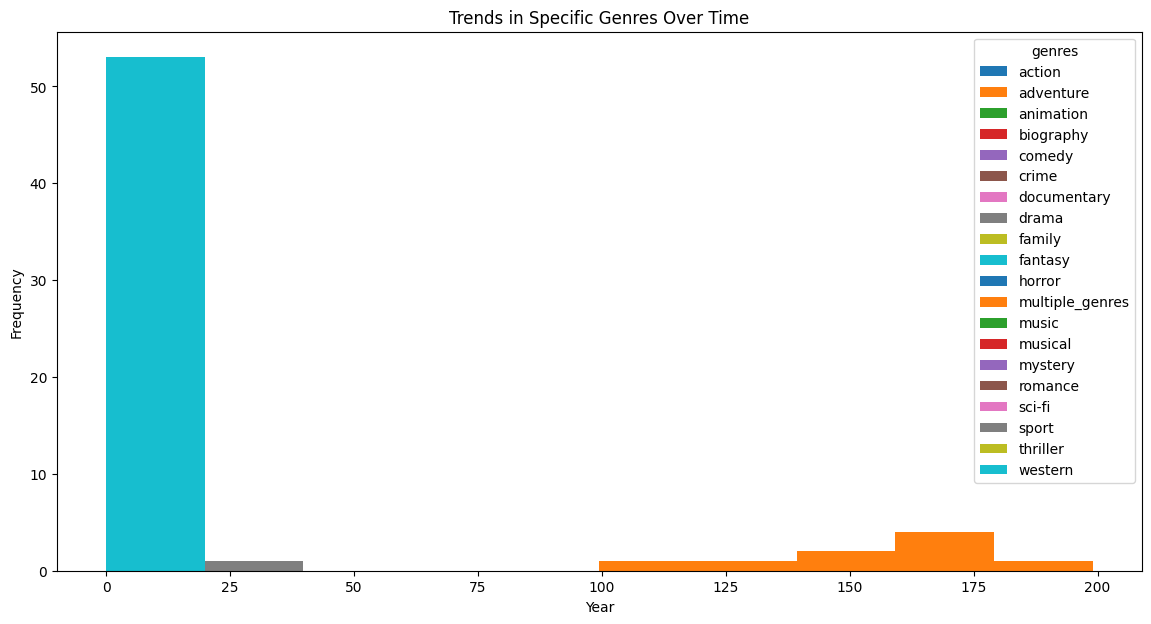

In [46]:
# Extract year from release date
df['release_year'] = df['release_date'].dt.year

# Plot film releases over time
line_plot = df.groupby('release_year').size()
plt.figure(figsize=(14, 7))
line_plot.plot(kind='line')
plt.title('Film Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

# Analyze trends in specific genres
genre_trends = df.groupby(['release_year', 'genres']).size().unstack().fillna(0)
genre_trends.plot(kind='hist', figsize=(14, 7))
plt.title('Trends in Specific Genres Over Time')
plt.xlabel('Year')



I proceeded to look into analysis of the audience through using vote count and genre to see how they correlate with success factor.

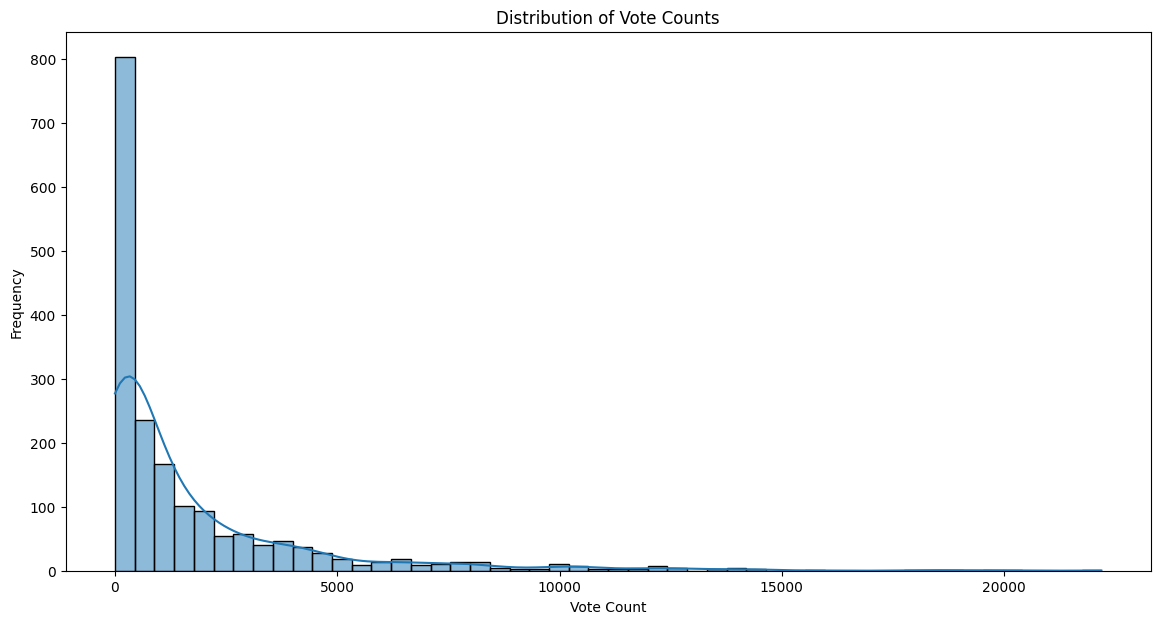

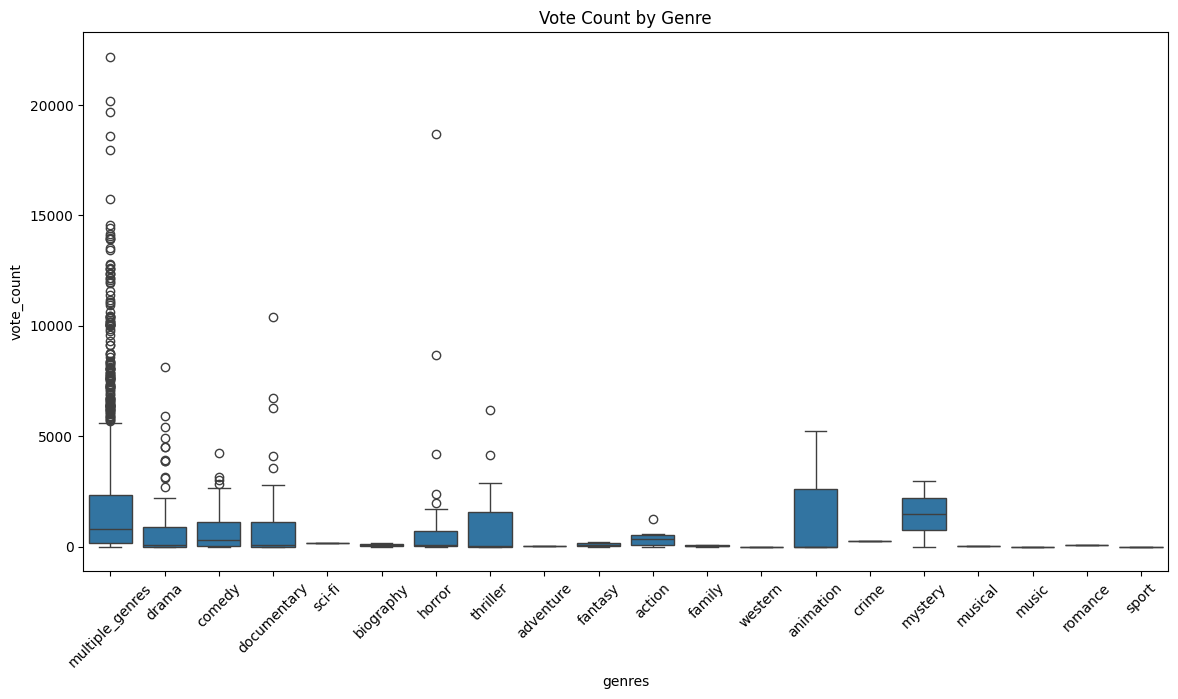

In [37]:
# analyzing audience through vote count
# analazing vote count by distribution
# Example: Analyzing vote count distribution
plt.figure(figsize=(14, 7))
sns.histplot(df['vote_count'], bins=50, kde=True)
plt.title('Distribution of Vote Counts')
plt.xlabel('Vote Count')
plt.ylabel('Frequency')
plt.show()

# Example: Analyzing vote count by genre
plt.figure(figsize=(14, 7))
sns.boxplot(x='genres', y='vote_count', data=df)
plt.title('Vote Count by Genre')
plt.xticks(rotation=45)
plt.show()


The final plot i wil do will entail different variables to visualize the relatiothis and distributin of the different variables.

In [40]:
# trying to explore  more comprehensive plot
# Interactive scatter plot: Budget vs Gross
fig = px.scatter(df, x='production_budget', y='worldwide_gross', color='genres', hover_data=['movie'],
                 title='Interactive Budget vs Worldwide Gross by Genre')
fig.show()